<a href="https://colab.research.google.com/github/ravichas/bifx-546/blob/main/Notebooks/Chapter07_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: Hypothesis and Inference

🎓 Course Context

Prepared for BIFX-546 – Machine Learning for Bioinformatics

Instructor: Sarangan Ravichandran, PhD., PMP

# 📘 Attribution & Reading Reference

This notebook is based on concepts, structure and examples from,

Data Science from Scratch, 2nd Edition by Joel Grus,published by O'Reilly Media,Inc.

# Relevant Reading:

Data Science from Scratch, 2nd Edition — Chapter 7: [Hypothesis and Inference]

The material in this notebook has been **expanded with additional explanations,new examples, and code adaptations** to support instructional use and execution in a Google Colab Environment. Any additions, reformatting, or implementation details beyond the original text are the responsibility of the notebook author.

This notebook is intended for educational use only and does not replace the original book/code examples.

# Hypothesis Testing

Often Data Scientists want to test whether a certain hypothesis is likely to be true.


Hypothesis: A claim that we want to test

**Null Hypothesis** (H$_0$)

* Currently accepted value for a parameter (ex., mean)

**Alternate Hypothesis** (H$_a$) or Research Hypothesis

* Involves the claim to be tested

# Another way to look at this is

## Hypothesis Testing:

* Formal method Data Science use to decide whether a claim about the world is supported by data or not

 **The Process**
  * **Start with a claim you want to test**
    * Example: "The coin is fair" (50/50 chance of H/T)
  * A**ssume the claim is true, and figure out what you would expect to see**
    * if the coin is fair, flipping it 1000 times should give you 500 Hs (may be 480, may be 530, but somewhere close)
    * We know the pattern of what "randomness" looks like when the coin is fair
  * **Collect actual data**
    * Flip the coin 1000 times and count: you got 991 Hs
  * **Ask: "How weird is what I actually saw?"**
    * If the coin were fair, getting 900 heads out of 1000 would be extremely unlikely
    * This suggests our original assumption (fair coin) is probably wrong
  * **Make a decision**
    * If your data looks normal/expected --> The HYPOTHESIS is probably true
    * If your data looks weird/unlikely --> the HYPOTHESIS is probably false.


According to Tibshirani et al book on Statistical Learning [An Introduction to Statistical Learning], Hypothesis Testing is a rigorous statistical framework for answering simple "yes-no" questions about the data

# Example

We operate a candy-bar manufacturing plant and recently upgraded our production machines. The factory quality engineer now claims that the average weight of our candy bars is no longer 250 grams. To evaluate this claim, we set up the following hypotheses:

## Default Belief
$$ H_0: \mu = 250 \quad \text{(The factory still produces candy bars with a mean weight of 250 grams.)} $$

## Alternate Belief
$$ H_a: \mu \ne 250 \quad \text{(The mean weight has changed from 250 grams after the upgrades.)} $$

Note that $H_{0}$ and $H_{a}$ are mathematical opposites. For example, $H_a$ is whatever that $H_0$ is not.

We assume that the null is true unless the data proves otherwise.

Let us explore the possible outcomes for this test:
* Reject Null Hyp
* Fail to **Reject Null Hypothesis** (difficult to prove something is true)

Think of US judicial system while reading through this.

Rejecting $H_0$ does not prove $H_a$ is true; it means the data are sufficiently inconsistent with $H_0$ at level $\alpha$.


# How can we carry out the test?

* First we need a $H_0$ (default belief; nothing has changed after the upgrade) and $H_a$.
   - [ Note $H_0$ is the baseline assumption.]
* We need something called Test Statistic (that provides evidence for rejecting the $H_0$. This is calculated from sample data and is used to either reject the $H_0$ or **Fail** to reject the $H_0$
$$ T = \frac{\bar{x} - 250 } {s/\sqrt{n}} $$
Where:
  * $\bar{x}$ = sample mean weight
  * s = sample Standard Deviation (SD)
  * n = sample size
Note:
  * T = 0 --> The sample mean equals 250 exactly --> Consistent with $H_0$
  * T large positive: sample mean is far above 250
  * T is large negative:  sample mean is far below 250
  * large |T| means stronger evidence against $H_0$. The test statistic summarizes how consistent the data are with $H_0$.

# t-Statistic Formula Explainer

$$ T = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$

| Symbol | Name | What It Means | Practical Interpretation |
|--------|------|---------------|--------------------------|
| x̄ | Sample Mean | Average of observed data | Estimated central value from your sample |
| μ₀ | Hypothesized Mean | Mean under the null hypothesis (H₀) | The value you are testing against |
| s | Sample Standard Deviation | Spread of the sample data | How much individual observations vary |
| n | Sample Size | Number of observations | Amount of data collected |
| s/√n | Standard Error (SE) | Estimated variability of the sample mean | Uncertainty in the mean estimate |
| t | t-statistic | Standardized difference between x̄ and μ₀ | Number of standard errors the mean is away from μ₀ |

Numerator is for calculating the differnce. But, difference is meaningless. So, we must scale the difference by how much random variation we expect.

Denominator represents the expected fluctuation. How much the sample mean bounce, it varies with SD, $\sigma/\sqrt{n}$.

This fraction T statistic follows a standard normal distribution.

# Check out the Extra Information section at the end of the notebook for details on T-statistic


* We then compute a $p-value$ that measures the probability of having observed a comparable or extreme value of the **test statistic** under the $H_0$. In essence, p-value answers:
  * **If the true mean is 250 gms ($H_0$ is true), how unusual is the sample we observed?**
  * Note, If the null hypothesis holds, the test statistic T approximately follows a t-distribution (or approximately N(0,1) for large n).
  * If population is (approximately) normal OR n is reasonably large -> t is a good approxmation
  * Under normality, it's exact: T $\approx t_{n-1}$
  * If the data are i.i.d. and approximately normal (or n is large), then under H_0, T follows a t-distribution with n-1 degrees of freedom.
  * Note: "$H_0$ holds" means:
    * The true weight of all candy bars produced by the factory (entire population) is actually 250 grams.
* Finally using the p-value we either "reject the $H_0$" or "Fail to reject" $H_0$
  * Let us consider the example: If $T=2.33$. This means that our sample mean is 2.33 Standard Errors away from 250 grams. This value in the distribution lies at the extreme and lies outside of $\pm$ 2.33 that means only 2% of samples would give such an extreme result if $\mu = 250$ were actually true. Hence, p=0.02 (one-sided) and p=0.02*2 = 0.04
  * We need to decide whether 4% small? We also have a pre-determined cutoff ($\alpha$). Using $\alpha$, we Reject $H_0$ if p $\lt$ 0.05, Fail to reject if $H_0$ if p >= 0.05. Based on this, we reject the null-hypothesis at $\alpha$ = 1 - 0.95 =  0.05

 # Repeated Sampling Experiment

1.	Take a sample of size n.
2.	Compute T.
3.	Put it back.
4.	Take another sample.
5.	Compute T again.
6.	Repeat 10,000 times.

You would not get the same T each time.

You would get:
```
0.8
-1.2
2.1
0.3
-0.6
1.5
...
```

These values will form a distribution. That distribution is the t-distribution (if $H_0$ is true)

# Errors:

* **Type 1 Error (False Positive)**: $H_0$ is actually true (true mean is still 250g). But, we reject $H_0$. We conclude the machine changed the mean weight even though it did not.
  * Consequences:
    * We stop production
    * we recalibrate the machine
    * blame the upgrade
    * but nothing was wrong
  * Are Type-1 errors bad?
* **Type II Error (False Negative):** $H_{0}$ is actually false (mean has really changed). But, we failed to reject the Null.  
    * Consequences:
        * We continue production without noticing
        * Candy bars size over/under-filled
        * Customers may complain
        * Quality issues arise
      * Are Type-II errors bad?
* **Power of the test**
  * Power = 1 - Type II error rate
    * Our test correctly detects real changes
* **Trade-off between Type1/TypeII errors** and the choice of $\alpha$ ?
  * You cannot minimize both errors simultaneously
    * Lowering Type I error increase Type II error
    * Lowering Type II increase Type I error

# Statistically Significant  (SS)

A result is SS when

* p-value $\lt$ $\alpha$

Note:
* SS does not mean
  * effect is big
  * result is true
  * Always report an effect size (difference in means) and a CI

# Example of testing whether the coin fair

if we want to test whether the coin (p = prob of landing Hs) we have is fair.  

$$ H_0 : p = 0.5 $$
$$ H_A : p \ne 0.5 $$

# Basic ideas

* Bernoulli Trial (Single flip)
  * Each individual flip is a "Bernoulli trial"
  * Only two outcomes: H (Success) or T (failure)
  * Probability of Hs = p (for a fair coin, p = 0.5)
* Binomial Distribution (Multiple Independent Flips)
  * A reference table/curve that tells you probabilities
  * Created mathematically (not from your experiment)
  * Shows what outcomes to expect IF the coin is fair (p=0.5)
  ### Connection to Bernoulli
    * Each of the flip is a Bernoulli trial
    * X = number of Hs in one trial
    * X follows a Binomial(n=100, p=0.5) distribution
  ### What Binomial Distribution Tells You:
    * P(X=0) = Prob of 0 Hs in 100 flips
    * ...
    * P(X=65) = Prob of 65 Hs in 100 flips
    * etc.

  $$ P(X = k) = C(n, k) \times p^{k} \times (1-p)^{(n-k)} $$
  where $C(n,k) = "n choose k" = combinations

* Normal Approximation (when n is large; number of times to repeat the bernoulli trial)



# Real Experiment
  * Flip a coin = 100 times
  * Count the result, X = 65 Hs (example)
  * One experiment. One Number: 65
* Question
  * Is this coin fair, or is it biased?

# Using a pre-existing Reference Distribution

  * Mathematicians already derived a reference distribution for us
    * They derived the Binomial(n=100, p=0.5) distribution
    * This distribution shows, "If the coin is fair, here is likely each outcome is"
    * It tells us the probability of getting 0 Hs, 1Hs, ....100 Hs.
  * If we take one result from our experiment (X = 65) and compare it with the reference
    * Look at our pre-existing Binomial Distribution
    * Ask: Where does my result (H=65) fall on this distribution?
    * Find: "Getting 65 or more Hs happens only 0.3% of the time if the coin is fair
  * Make a decision
    * Since 65 is unlikely under the "fair coin" distribution
    * Conclude: The coin is biased


# Mean

$$ E[X] = \sum k \times P(X=k)   \text{  [ for k = 0 to n}] $$

After working with Algebra, we get

E[X] = np

Example

* If we flip 100 coin (n = 100)
* Each has p = 0.5 chance of Hs
* Expected Hs $\mu$ = 100 * 0.5 = 50

# Standard Deviation (SD)

$$ \text{Var}[X] = E[X^2] - (E[X])^2 $$

After working through Algebra,

$$ \text{Var}[X] = \sqrt{np(1-p)} $$

# Example

* n = 100, p = 0.5
* Variance = 100 * 0.5 * 0.5 = 25
* SD: $\sigma$ = $\sqrt{25}$ = 5



As n increases, Binomial(n, p) --> Normal Distribution

The limiting normal has the SAME mean (np) and variance (np(1-p))

When np$\ge$10 and n(1-p) $\ge$ 10, he approximation is accurate enough for practical use.

In [ ]:
# ==== Course setup: safe clone + cd + import path ====
import os
import sys

REPO_URL = "https://github.com/joelgrus/data-science-from-scratch.git"
REPO_DIR = "data-science-from-scratch"

# 1. If we're *anywhere inside* the repo, move to the parent directory first
cwd = os.getcwd()
if REPO_DIR in cwd.split(os.sep):
    parts = cwd.split(os.sep)
    # Walk up until we are at .../data-science-from-scratch
    while parts and parts[-1] != REPO_DIR:
        parts.pop()
    # Now go to the directory *above* the repo
    parent_dir = os.sep.join(parts[:-1]) or "/"
    os.chdir(parent_dir)
    print(f"Moved to parent directory: {os.getcwd()}")

# 2. Clone only if needed
if not os.path.exists(REPO_DIR):
    print("Cloning repo...")
    !git clone {REPO_URL}
else:
    print(f"{REPO_DIR} already exists — skipping clone.")

# 3. cd into the repo (this is where you'll live most of the time)
%cd {REPO_DIR}

Moved to parent directory: /content
data-science-from-scratch already exists — skipping clone.
/content/data-science-from-scratch


# Average Proportion of Bernoulli variable

Each trial is a Bernoulli random variable:

$$X_i \sim \text{Bernoulli}(p)$$

For one trial:

$$E[X_i] = p$$

Now the Binomial variable is:

$$X = X_1 + X_2 + \dots + X_n$$

Using linearity of expectation:

$$E[X] = E[X_1] + \dots + E[X_n]$$

$$E[X] = p + p + \dots + p = n p$$

So:

$$\mu = n p$$

In [ ]:
from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
  """ Returns mu and sigma corresponding to a Binomial(n, p) """
  mu = p * n
  sigma = math.sqrt(p * (1-p) * n)
  return mu, sigma


In [ ]:
from scratch.probability import normal_cdf

# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float, mu: float = 0, sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is greater than lo."""
  return 1 - normal_cdf(lo, mu, sigma)


# It's between if it's less than hi, but not less than lo
def normal_probability_between(lo: float, hi: float, mu: float = 0,
                               sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is between lo and hi."""
  return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)


# It's outside if it's not between
def normal_probability_outside(lo: float, hi: float, mu: float = 0,
                               sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is not between lo and hi."""
  return 1 - normal_probability_between(lo, hi, mu, sigma)

# Confidence Interval

A confidence interval (CI) provides a range of plausible values for a population parameter, such as a mean.

If you compute a 95% CI for the mean weight of candy bars:

$$ \bar{x} \pm 1.96 \cdot \frac{s}{\sqrt{n}} $$

This gives a range such that:

If you repeated the sampling process infinitely many times, 95% of the intervals would contain the true mean μ.


* A CI does not say “there is a 95% chance μ is in this interval.”
* Instead: “This method captures μ in 95% of repeated experiments.”
* The CI width reflects uncertainty. Smaller width = more precision.

Suppose:
* Sample mean = 247 g
    * s1 = [243.1, 250.9], s2 = [246.8, 254.2] ....  sn
    * Each of these is a CI from a sample
    * CI1, CI2, CI3, CI4, ... In from s1, s2, s3, s4, ... sn
    * Of all these intervals 95% will contain the true mean $\mu$ and 5% will miss. **We never know which interval is correct, but the procedure succeeds 95% of the time.**
* Standard deviation = 20g
* n = 100

95% CI:

$247 \pm 1.96 \cdot \frac{20}{10} = 247 \pm 3.92$

That is:

[243.08,\; 250.92]

Because 250g is inside this interval → we fail to reject H₀ at α = 0.05.

CI ↔ Hypothesis Test

* A 95% CI and a two-sided hypothesis test at α = 0.05 give the same decision:
* If the CI excludes 250 → reject H₀
* If the CI includes 250 → fail to reject H₀


CI Assumptions:
* Independent observations (selected independent of the others)
* Accurate Data (non biased)

# p-Hacking

With some help, you can find the "significant" hypothesis if you test enough hypotheses against your dataset

To do good science, decide on your hypotheses before looking at the data.

This following code simulates flipping a fair coin 1000 times per experiment and repeating that experiment 1000 times.

Each time, we test the null hypothesis:

H₀: The coin is fair (p = 0.5)

We reject fairness if the number of heads falls outside the 5% significance range (469–531).

Even though the coin is perfectly fair, the simulation finds 46 rejections out of 1000 experiments — about 4.6%.

That’s approximately the expected 5% false positive rate.

In [ ]:
# p-Hacking
import random

from typing import List
def run_experiment() -> List[bool]:
  """Flips a fair coin 1000 times, True = heads, False = tails"""
  return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment: List[bool]) -> bool:
  """Using the 5% significance levels"""
  num_heads = len([flip for flip in experiment if flip])
  return num_heads < 469 or num_heads > 531

random.seed(0)

experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])
assert num_rejections == 46

In [ ]:
num_rejections

46

#A/B Testing

Check the book/Book-Github for details

#Here is a basic overview of A/B Testing:

**What we estimate in an A/B test**

You have two variants:

* A (control) has some true (unknown) parameter $\theta_A$
* B (treatment) has some true (unknown) parameter $\theta_B$

What $\theta$ is depends on the metric:

**If the metric is a conversion rate (most common)**

* $\theta_A = p_A$ = true conversion probability for A
* $\theta_B = p_B$ = true conversion probability for B

**Primary estimand (what we care about):**

* Difference: $\Delta = p_B - p_A $(absolute lift)
* Ratio: RR = $\frac{p_B}{p_A}$ (relative lift)
* Or log-odds difference if you prefer modeling convenience.

**If the metric is continuous (revenue, time-on-site, etc.)**

* $\theta_A = \mu_A$ = true mean outcome for A
* $\theta_B = \mu_B$ = true mean outcome for B
Often also the variance \sigma^2.

**Primary estimand:**

* $\Delta = \mu_B - \mu_A$

In an A/B test we estimate $\hat p_A$ and $\hat p_B$, compute the observed difference $\hat{\Delta}$, then under the null hypothesis of no difference we calculate a p-value: the chance of seeing a difference at least as extreme as $\hat\Delta$; if $p \le \alpha$ we reject the null.

# another way of looking at A/B Testing

It’s the population of eligible users who could be in the experiment (e.g., all visitors during the test period who meet criteria).

You **split that one population randomly into two groups**:
* **Group A:** users assigned A
* **Group B:** users assigned B

**Each group has its own conversion probability because the experience differs.**

**Quick example**

If **1,000** users see A and 50 buy:
* $\hat{p_A} = 50/1000 = 5\%$

If **1,000** users see B and 60 buy:
* $\hat{p_B} = 60/1000 = 6\%$

Then lift is 1$\%$ point.

In a classical (frequentist) A/B test, **we do not assume the true difference ($p_A - p_B$) is random and normal**.

**What’s random is the estimate from data**

We treat the observed/sample difference
$\hat{\Delta} = \hat{p_B} - \hat{p_A}$
as a random variable, because it changes **from sample to sample**.

The true parameters $p_A$, $p_B$ (and $\Delta = p_B - p_A$) are treated as fixed but unknown.

Carry out Hyp Testing

$H_0$: $p_A - p_B$ = 0

$H_A$: Not zero

# Bayesian Inference

## 1. What we were doing before (classical inference)

Up to now, we’ve been doing things like:

“If the null hypothesis were true, there’s only a 3% chance we would see data this extreme (or more extreme).”

Key idea:
- We assume a hypothesis is true (usually “no effect”).
- Then we ask how surprising the observed data would be under that assumption.
- The probability statements are about possible data outcomes, not about the parameter itself.

That’s what a p-value is:

$P(\text{data} \mid \text{null hypothesis})$

Note:
“If this hypothesis were true, what distribution would the data come from?”




| Framework   | What is treated as random? | What the probability is about |
|-------------|----------------------------|--------------------------------|
| Frequentist (classical Hypothesis Testing)| Data (parameter fixed)     | $ P(\text{data} \mid \theta) $ |
| Bayesian    | Parameter (data observed)  | $ P(\theta \mid \text{data}) $ |

* Parameter $\theta$ is fixed in Frequentist,
* Parameter $\theta$  has a distribution in Bayesian

# Note about Parameter vs Hypothesis

They are related but not the same.

	•	Parameter (θ) = unknown quantity describing the population

Example: μ, p, β

  •	Hypothesis = a statement about the parameter

Example:

	•	H₀: μ = 0
	•	H₀: p = 0.5
	•	H₀: β = 0

So:

A hypothesis fixes the parameter at a specific value.

#2. The Bayesian shift: what changes?

Bayesian inference flips the perspective.

**Instead of treating the data as random and the parameters as fixed-but-unknown**, we:

* Treat the unknown parameters themselves as uncertain.

So now:
* The parameter (like the coin’s probability of heads) is modeled as a random variable
* We describe our uncertainty about it with a probability distribution

This lets us make probability statements like:

`“There’s a 95% probability that the true parameter lies in this range.”`

**That is not allowed in classical hypothesis testing.**

#3. The three-step Bayesian workflow (high level)

**Step 1:** Prior — what you believe before data

You start with a prior distribution for the unknown parameter.

In the coin example:
* The parameter is p: the probability of heads
* **Since p must be between 0 and 1, we use a Beta distribution**

$ Beta($\alpha$,$\beta$)$ distribution, the probability density is

$$f(x)=\frac{1}{B(\alpha,\beta)}\,x^{\alpha-1}(1-x)^{\beta-1}, \quad 0\le x\le 1$$

## Why Beta Distribution?
Check Wiki for details, https://en.wikipedia.org/wiki/Beta_distribution

The Beta distribution is flexible:
* It only lives on [0,1]
* Its shape reflects your belief

Interpretation of Beta($\alpha,\beta$):
* **Center (roughly):** $\alpha/(\alpha+\beta)$
* **Strength of belief:** larger $\alpha$,$\beta$ = more confidence

Examples:
* **Beta(1,1)**: completely agnostic (uniform); when $\alpha$ = $\beta$ = 1, this will lead to $1/B(1,1)$
$B(1,1)=\int_0^1 1\,dx = 1$. So the density becomes:
$$f(x)=1 \quad \text{for } 0\le x\le 1$$
* **Beta(55,45)**: belief that $p \approx 0.55$, with some confidence
* **Beta(30,10)**: belief that $p$ is high (around 0.75)

#Important:
The prior is not saying the value is random in reality — it encodes your uncertainty.



##4. Step 2: Data — what you observe

You flip the coin:
* Observe h heads
* Observe t tails

This data has a Binomial structure:
* Given a value of p, some outcomes are more likely than others

This part answers:

“If the true probability were p, how likely is this data?”

That’s called the likelihood.

##5. Step 3: Posterior — updated belief after data

Bayes’ theorem combines:
* prior belief
* data evidence

## Result:

The posterior distribution for p

In this special case:
* Beta prior + Binomial data → Beta posterior
* This is called a conjugate prior

Update rule:
$\text{Posterior} = \text{Beta}(\alpha + h,\ \beta + t)$

Interpretation:
* Prior contributes “pseudo-observations”
* Data adds real observations

##6. Why different priors give different posteriors (at first)

Example: 10 coin flips, 3 heads.

The observed proportion is:

3 / 10 = 0.30

Now suppose we use Bayesian inference.

Posterior ∝ Likelihood × Prior

The likelihood comes from the data (3 heads, 7 tails).
The prior represents what we believed about the coin *before* seeing the data.

---

### Case 1: Uniform prior (no strong belief)

If we start with a neutral prior (all values of p equally likely),

the posterior will be close to the observed proportion:

Posterior mean ≈ 0.30–0.33

The data mostly determines the result.

---

### Case 2: Strong “fair coin” prior

If we strongly believed the coin was fair before seeing data,

the posterior will be pulled toward 0.50.

Even after observing 3/10 heads, the posterior may be around 0.48.

The prior belief resists change because it is strong.

---

### Case 3: Strong “biased coin” prior (toward 0.75)

If we strongly believed the coin is usually biased toward heads,

the posterior will be pulled upward, perhaps near 0.70.

The same data now leads to a different updated belief.

---

### What is happening?

The prior acts like additional information.

With only 10 flips (small data),
prior beliefs still influence the result.

As the number of flips increases,
the likelihood dominates,
and different priors lead to nearly identical posteriors.

---

### Why this raises philosophical concerns

Two people can observe the same data
and reach different conclusions
because they started with different prior beliefs.

Bayesian response:

That is expected — inference combines
prior belief + new evidence.

With enough data, reasonable priors converge.

#7. Why priors matter less with lots of data

As data increases:
* The data overwhelms the prior
* All reasonable priors lead to nearly the same posterior

Seeing 1,000 heads out of 2,000 flips will convince almost everyone the coin is near 0.5.

So:
* Priors matter most with small samples
* Priors matter least with large samples









# 8. What Bayesian inference lets you say (the payoff)

After specifying:
- A likelihood (data model)
- A prior distribution for the parameter

we compute the posterior distribution:

P(θ | data)

Now we can say:

“There is a 95% posterior probability that p lies between 0.49 and 0.51.”

“There is a 5% posterior probability that the coin is approximately fair.”

These are probability statements about the parameter,
given the data and the model assumptions.


---

## Contrast with classical inference

Classical hypothesis testing says:

“If the coin were fair, data this extreme would occur only 5% of the time.”

This is a probability statement about data,
assuming a fixed parameter.

Same number (5%).
Completely different interpretation.






# 9. Why this is controversial

Two reasons:
	1.	Subjectivity: choice of prior
	2.	Complexity: math and computation (though software solves this now)

Because of this, many textbooks teach Bayesian ideas conceptually but rely on frequentist tools in practice.

#One-paragraph summary

**Classical inference** makes probability statements about data assuming a hypothesis is true.

**Bayesian inference** instead treats the unknown parameter as uncertain, starts with a prior belief, updates it with data using Bayes’ theorem, and produces a posterior distribution. This lets us make direct probability statements about the parameter itself, which is intuitive but depends on the choice of prior.

##What Bayesian inference estimates

Bayes gives you a distribution over the unknowns after seeing data:

$p(\theta_A,\theta_B \mid \text{data})$

From that you compute the quantities you actually want:

1) Probability B is better than A, $P(\Delta > 0 \mid \text{data})$

  This is the Bayesian analog of “is B better?” (but it’s a probability statement).

2) Size of the effect (with uncertainty)

  Posterior for $\Delta$, plus a credible interval:
	•	e.g. 95% credible interval for \Delta

3) Expected loss / decision-focused quantities

If shipping the wrong variant has cost, you can estimate:
* $P(\Delta > \delta)$ for a minimum meaningful lift $\delta$
* expected regret if you choose B vs A
  * expected revenue gain, etc.

Concrete example: binary conversions

Suppose:
* $A: x_A \text{ conversions out of } n_A$
* $B: x_B \text{ conversions out of } n_B$

# Bayesian model:
* $p_A \sim \text{Beta}(\alpha,\beta)$
* $p_B \sim \text{Beta}(\alpha,\beta)$
* $Data: x_A \sim \text{Binomial}(n_A,p_A)$, same for B

# Posterior:
* $p_A \mid data \sim \text{Beta}(\alpha+x_A,\beta+n_A-x_A)$
* $p_B \mid data \sim \text{Beta}(\alpha+x_B,\beta+n_B-x_B)$

Then compute \Delta = p_B - p_A (by sampling) and report:
* $P(\Delta>0)$
* credible interval for $\Delta$
* $P(\Delta>\delta)$ if you have a threshold


##What’s the difference vs Bayesian inference?

###The big difference: what is random?

**Frequentist (classic A/B testing):**
* Treat $p_A$, $p_B$ as fixed but unknown constants.
* Treat the data as random because you could repeat the experiment.

**Bayesian:**
* Treat $p_A$, $p_B$ as unknown quantities with a probability distribution (a prior).
* After seeing data, update to a posterior distribution.

# Extra Information

# Longer version (ignore it first time)

# From Population → Sample → Standard Normal → t-Statistic

## 1️⃣ Population Level

Assume individual observations come from:

X ~ N(μ, σ²)

- μ = population mean (true average)
- σ = population standard deviation (true variability)

We want to learn about μ.

But we usually do NOT observe the full population.


---

## 2️⃣ Sample Level

We take a random sample of size n.

The sample mean is:

x̄ = (1/n) Σ Xi

Important fact:

The sampling distribution of the mean is:

x̄ ~ N(μ, σ² / n)

or equivalently,

x̄ ~ N(μ, σ / √n)

So:

- Center = μ  
- Spread = σ / √n  

This spread is smaller than σ because averaging reduces variability.


---

## 3️⃣ Standardizing the Sample Mean

Under the null hypothesis:

H₀: μ = μ₀

Then:

x̄ ~ N(μ₀, σ² / n)

Now subtract the center:

(x̄ − μ₀)

This centers the distribution at 0:

(x̄ − μ₀) ~ N(0, σ² / n)

Now divide by its standard deviation:

(x̄ − μ₀) / (σ / √n)

Result:

(x̄ − μ₀) / (σ / √n) ~ N(0,1)

🎯 This is when it becomes N(0,1).

Because we:
- Subtracted the mean
- Divided by the standard deviation

This is standardization.


---

## 4️⃣ When σ is Unknown (Real Life)

We replace σ with s (sample SD):

t = (x̄ − μ₀) / (s / √n)

Now the statistic follows:

t ~ t(n−1)

Instead of N(0,1)

Why?

Because replacing σ with s introduces extra uncertainty.

That is why we use the t-distribution.


---

# 🔎 Big Picture Summary

Population:        X ~ N(μ, σ²)

Sampling mean:     x̄ ~ N(μ, σ²/n)

Standardized:      (x̄ − μ) / (σ/√n) ~ N(0,1)

Estimated version: (x̄ − μ) / (s/√n) ~ t(n−1)

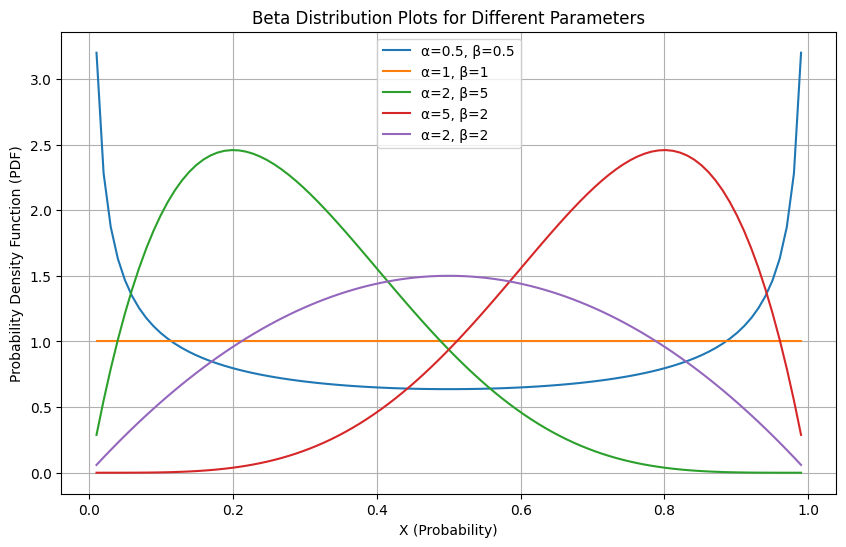

In [ ]:
# Beta distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the shape parameters for different distributions (alpha and beta)
params = [(0.5, 0.5), (1, 1), (2, 5), (5, 2), (2, 2)]

# Generate x-values (range [0, 1] for the standard beta distribution)
x = np.linspace(0.01, 0.99, 100)

# Plot each distribution
plt.figure(figsize=(10, 6))
for a, b in params:
    # Calculate the PDF for the given parameters
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=f'α={a}, β={b}')

plt.title('Beta Distribution Plots for Different Parameters')
plt.xlabel('X (Probability)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)
plt.show()